
1.    Formulate a particular question that might be interesting to answer by exploring this dataset (approx. 50 words in a markdown cell).
2.    Calculate statistics for the numerical and categorical attributes. Draw a short conclusion (approx. 150 words in a markdown cell).
3.    Use at least two different plotting techniques to plot the distribution of some numerical attributes. Draw short conclusions (approx. 150 words in a markdown cell).
4.    Generate two plots with the combined distribution of attributes and draw conclusions from them (approx. 150 words in a markdown cell).
5.    Make sure your conclusions are related to the question you have formulated.

In [2]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
#read data
df = pd.read_csv('./bank.csv')

In [60]:
df.head()

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

1.    Formulate a particular question that might be interesting to answer by exploring this dataset (approx. 50 words in a markdown cell).

Is it possible to predict whether or not the subscribed variable can be predicted from the other variables? Which variables are most responsible for the subscribed outcome?

2. Calculate statistics for the numerical and categorical attributes. Draw a short conclusionSome EDA

#### 2.1 Numerical Attributes

In [5]:
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

In [6]:
df.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


C:\Users\brand\AppData\Local\Temp\ipykernel_3084\2751630893.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr());


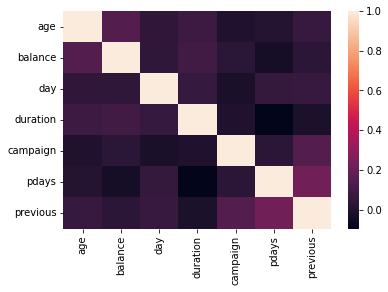

In [8]:
#correlation matrix
sns.heatmap(df.corr());

The heatmap above shows little correlation between numerical attributes

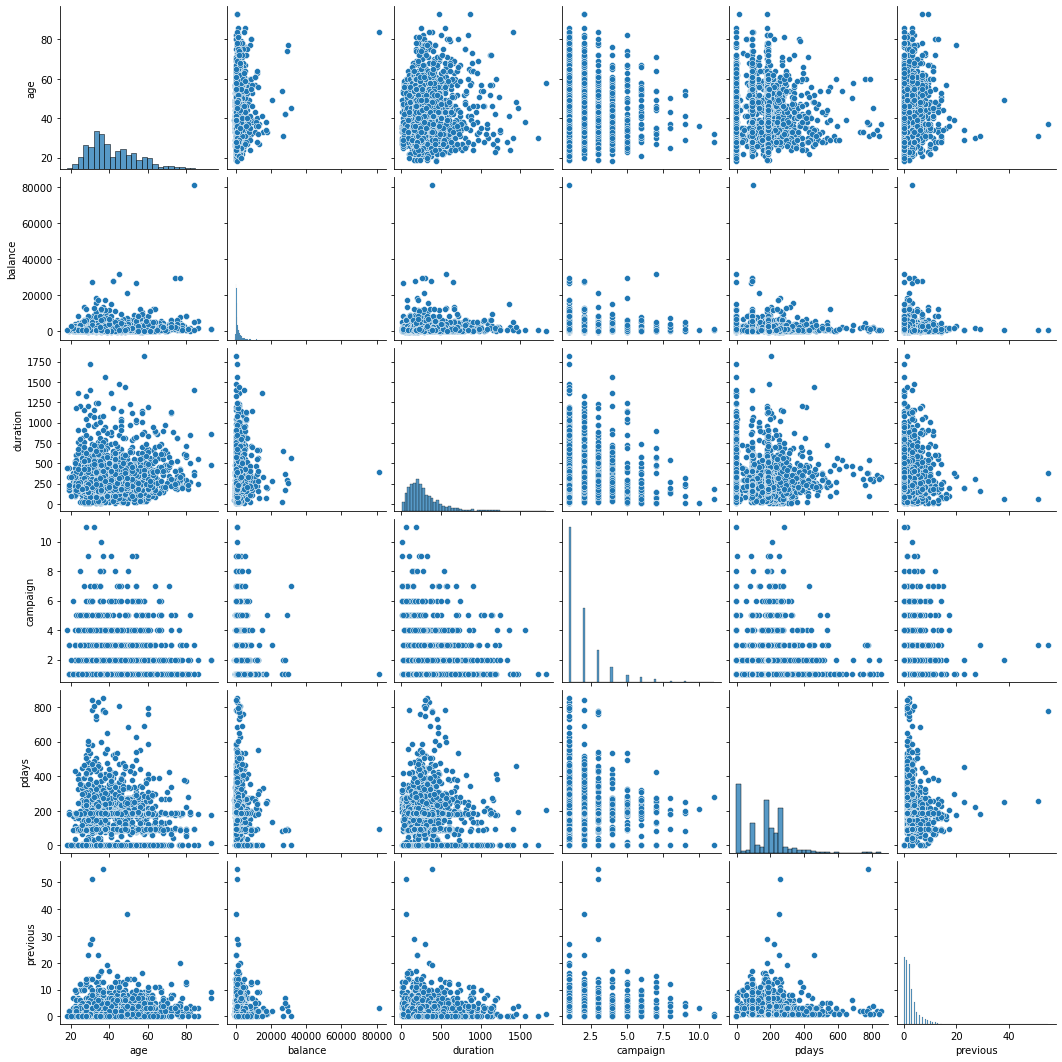

In [9]:
# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(data=df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']].dropna())
plt.show()

#### 2.2. Quick Examination of Categorical Attributes

In [10]:
df['marital'].value_counts()

married     1111
single       674
divorced     215
Name: marital, dtype: int64

In [11]:
df['marital'].count()

2000

Married is the most common marital value in the dataset

3. Use at least two different plotting techniques to plot the distribution of some numerical attributes. Draw short conclusions 

In [12]:
#histogram

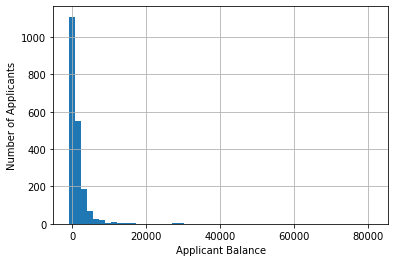

In [13]:

df['balance'].hist(bins=50)
plt.xlabel('Applicant Balance')
plt.ylabel('Number of Applicants')
plt.show()



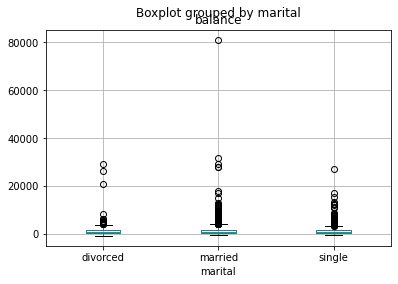

In [14]:
#boxplot
df.boxplot(column='balance', by='marital')
plt.show()

Conclusions:

4. Generate two plots with the combined distribution of attributes and draw conclusions from them

c:\Users\brand\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


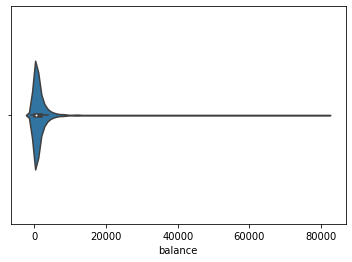

In [18]:
#violion plot
sns.violinplot(x=df['balance'], orient='v', width=0.5)
plt.show()

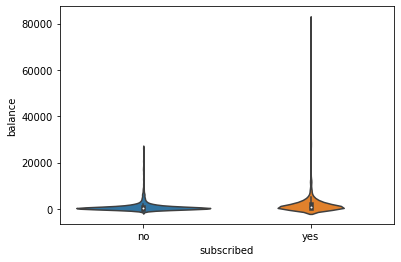

In [23]:
sns.violinplot(data=df, x='subscribed', y='balance')
plt.show()

In [24]:
frequency_table = df['subscribed'].value_counts(ascending=True)
print('Frequency Table for Subscription status:') 
print(frequency_table)

Frequency Table for Subscription status:
no     1000
yes    1000
Name: subscribed, dtype: int64


Data is very balanced

In [61]:
#replace yes and no with 1 and 0
df['loan'].replace(to_replace=['yes','no'], value=[1.0,0.0],inplace=True)
df.head()

age          job   marital  education default  balance housing  loan  \
0  32.0   technician    single   tertiary      no      392     yes   0.0   
1  39.0   technician  divorced  secondary      no      688     yes   1.0   
2  59.0      retired   married  secondary      no     1035     yes   1.0   
3  47.0  blue-collar   married  secondary      no      398     yes   1.0   
4  54.0      retired   married  secondary      no     1004     yes   0.0   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [62]:
frequency_table = df['loan'].value_counts(ascending=True)
print('Frequency Table for Subscription status:') 
print(frequency_table)

Frequency Table for Subscription status:
1.0     250
0.0    1750
Name: loan, dtype: int64


In [67]:
pivot_table = df.pivot_table(values='subscribed', 
                                index='loan',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean()) 

In [68]:
# Print pivot table
print(pivot_table)

      subscribed
loan            
0.0     0.546857
1.0     0.172000


This means that the chance of a customer being subscribed given that they have a loan is 54.7%, and only 17% otherwise. 

Conclusions:

5. Make sure your conclusions are related to the question you have formulated.

Yes, we can now tell that loan amount is related to the chance of being subscribed.